<a href="https://colab.research.google.com/github/nourelfaramawy/Comparator-Functions/blob/main/Comparator_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

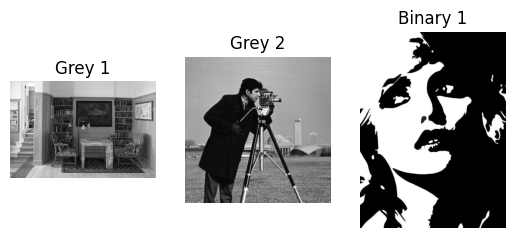

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO
from PIL import Image
url1 = 'https://drive.google.com/uc?id=1ormFI8z-njNh1vlDgf7bh39VGA2lfdcY'
url2 = 'https://drive.google.com/uc?id=1cNOOQKz0GFxph-tFnCF6L3WSynYykRHm'
url3 = 'https://drive.google.com/uc?id=1Is8GBZiPg7tdb1uXIYiZaNtVqIT06eD6'

img1 = Image.open(BytesIO(requests.get(url1).content)).convert('L')
img2 = Image.open(BytesIO(requests.get(url2).content)).convert('L')
img3 = Image.open(BytesIO(requests.get(url3).content)).convert('L')
#img1 = cv2.cvtColor(cv2.imdecode(np.fromstring(requests.get(url1).content, np.uint8), -1), cv2.COLOR_BGR2RGB)
#img2 = cv2.cvtColor(cv2.imdecode(np.fromstring(requests.get(url2).content, np.uint8), -1), cv2.COLOR_BGR2RGB)
#img3 = cv2.cvtColor(cv2.imdecode(np.fromstring(requests.get(url3).content, np.uint8), -1), cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Grey 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2 , cmap='gray')
plt.title('Grey 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3 , cmap='gray')
plt.title('Binary 1')
plt.axis('off')

plt.show()

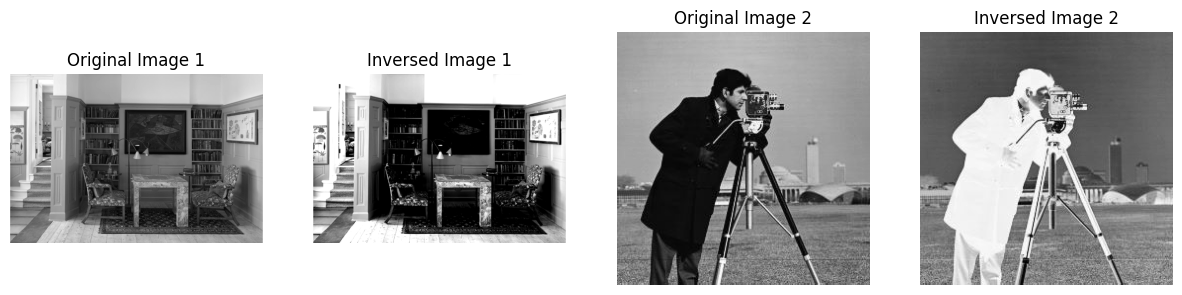

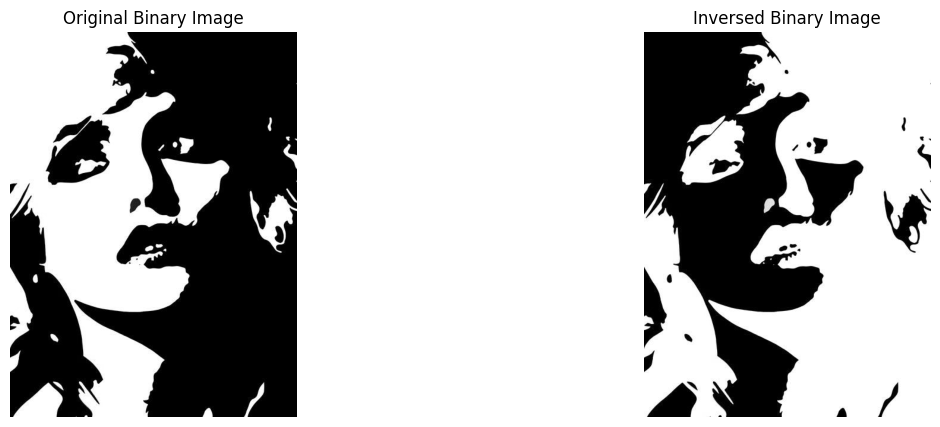

In [ ]:
img1_np = np.array(img1)
img2_np = np.array(img2)
img3_np = np.array(img3)


def inverse_img(image):

    inverted_image = 255 - image

    return inverted_image

def increase_brightness(image, value=30):
    return np.clip(image + value, 0, 255)

def decrease_brightness(image, value=30):
    return np.clip(image - value, 0, 255)

def increase_contrast(img, factor):
    # Convert PIL image to numpy array
    img_array = np.array(img)

    # Calculate the mean intensity of the image
    mean_intensity = np.mean(img_array)

    # Adjust the contrast by scaling the intensity difference from the mean
    adjusted_img = np.clip((img_array - mean_intensity) * factor + mean_intensity, 0, 255).astype(np.uint8)

    # Convert numpy array back to PIL image
    adjusted_img = Image.fromarray(adjusted_img)

    return adjusted_img
# def increase_contrast(image):
#     lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
#     cl = clahe.apply(l)
#     limg = cv2.merge((cl, a, b))
#     final_img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
#     return final_img

contrasted_img1 = increase_contrast(img1,2)
contrasted_img2 = increase_contrast(img2,2)
contrasted_img3 = increase_contrast(img3,2)

increased_brightness_img1 = increase_brightness(img1_np)
decreased_brightness_img2 = decrease_brightness(img2_np)

inversed_img1 = inverse_img(img1_np)
inversed_img2 = inverse_img(img2_np)
inversed_img3 = inverse_img(img3_np)

# Plot images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(contrasted_img1, cmap='gray')
plt.title('Inversed Image 1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img2 , cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(inversed_img2, cmap='gray')
plt.title('Inversed Image 2')
plt.axis('off')

plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inversed_img3 , cmap='gray')
plt.title('Inversed Binary Image')
plt.axis('off')



plt.show()

ssim_value -0.9905534406920822
real_ssim -0.05334637462480349


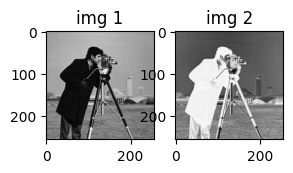

In [ ]:
# SSIM FUNCTION

import numpy as np
from skimage.metrics import structural_similarity as ssim


def ssim_func(img1, img2, c1 = 0.065, c2 = 0.065):

  img1 = img1.astype(np.float64)
  img2 = img2.astype(np.float64)

  # means of both images
  img1_mean = np.mean(img1)
  img2_mean = np.mean(img2)

  n, m = img1.shape
  img1_img2_covariance = np.sum((img1 - img1_mean) * (img2 - img2_mean)) / (n * m)

  #variances of both images
  img1_variance = np.var(img1)
  img2_variance = np.var(img2)

  #c1 = (0.01 * 255) ** 2
  #c2 = (0.03 * 255) ** 2

  # ssim calc
  ssim = (((2 * img1_mean * img2_mean) +c1) * ((2 * img1_img2_covariance )+ c2)) / ((img1_mean ** 2 + img2_mean ** 2 + c1) * (img1_variance + img2_variance + c2))

  return ssim


plt.subplot(1, 4, 1)
plt.imshow(img2 , cmap='gray')
plt.title('img 1')
plt.subplot(1, 4, 2)
plt.imshow(inversed_img2 , cmap='gray')
plt.title('img 2')

img1_array = np.array(img2)
img2_array = np.array(inversed_img2)

ssim_value = ssim_func(img1_array, img2_array)
real_ssim, _ = ssim(img1_array, img2_array, full=True)
print("ssim_value",ssim_value)
print("real_ssim",real_ssim)


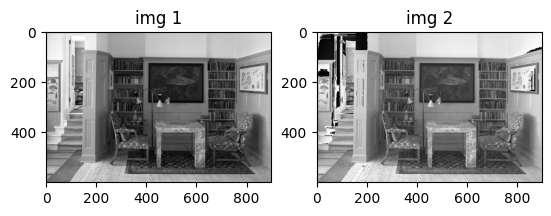

ssim_value: 0.6837091224792923
real_ssim: 0.8604606253164356


In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def ssim_func(img1, img2, c1=0.01, c2=0.03):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    img1_mean = np.mean(img1)
    img2_mean = np.mean(img2)

    n, m = img1.shape
    img1_img2_covariance = np.sum((img1 - img1_mean) * (img2 - img2_mean)) / (n * m)

    img1_variance = np.var(img1)
    img2_variance = np.var(img2)

    ssim_value = (((2 * img1_mean * img2_mean) + c1) * ((2 * img1_img2_covariance) + c2)) / ((img1_mean ** 2 + img2_mean ** 2 + c1) * (img1_variance + img2_variance + c2))

    return ssim_value

# Load and display images
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('img 1')
plt.subplot(1, 2, 2)
plt.imshow(increased_brightness_img1, cmap='gray')
plt.title('img 2')
plt.show()

# Calculate SSIM using the custom function for both images
img1_array = np.array(img1)
img2_array = np.array(increased_brightness_img1)

ssim_value = ssim_func(img1_array, img2_array)
real_ssim, _ = ssim(img1_array, img2_array, full=True)

print("ssim_value:", ssim_value)
print("real_ssim:", real_ssim)


In [ ]:
def IOU(img1, img2):
    i = (img1 != 0) & (img2 != 0)
    u = (img1 != 0) | (img2 != 0)
    iou = np.sum(i) / np.sum(u)
    return iou

iou_img1inverse = IOU(img1_np,inversed_img1)
iou_img2inverse = IOU(img2_np,inversed_img2)
iou_img3inverse = IOU(img3_np,inversed_img3)

iou_img1contrast = IOU(img1_np,contrasted_img1)
iou_img2contrast = IOU(img2_np,contrasted_img2)
iou_img3contrast = IOU(img3_np,contrasted_img3)

print("iou_img1inverse:",iou_img1inverse)
print("iou_img2inverse:",iou_img2inverse)
print("iou_img3inverse:",iou_img3inverse)
print("iou_img1contrast:",iou_img1contrast)
print("iou_img2contrast:",iou_img2contrast)
print("iou_img3contrast:",iou_img3contrast)

iou_img1inverse: 0.9984444444444445
iou_img2inverse: 0.99822998046875
iou_img3inverse: 0.12875935658544355
iou_img1contrast: 0.9994740740740741
iou_img2contrast: 0.998443603515625
iou_img3contrast: 0.4530848861283644


In [ ]:
def dice(img1,img2):
  i = (img1 != 0) & (img2 != 0)
  u = (img1 != 0) | (img2 != 0)
  sum=(np.sum(i)+np.sum(i))/(np.sum(u)+np.sum(i))
  return sum
dice_img1inverse = dice(img1_np,inversed_img1)
dice_img2inverse = dice(img2_np,inversed_img2)
dice_img3inverse = dice(img3_np,inversed_img3)

dice_img1contrast = dice(img1_np,contrasted_img1)
dice_img2contrast = dice(img2_np,contrasted_img2)
dice_img3contrast = dice(img3_np,contrasted_img3)

print("dice_img1inverse:",dice_img1inverse)
print("dice_img2inverse:",dice_img2inverse)
print("dice_img3inverse:",dice_img3inverse)
print("dice_img1contrast:",dice_img1contrast)
print("dice_img2contrast:",dice_img2contrast)
print("dice_img3contrast:",dice_img3contrast)

dice_img1inverse: 0.9992216168130769
dice_img2inverse: 0.9991142062982986
dice_img3inverse: 0.22814314819936
dice_img1contrast: 0.9997369678693286
dice_img2contrast: 0.9992211956936703
dice_img3contrast: 0.6236179186139291


In [ ]:
import math
from PIL import Image
def RMSD(img1 , img2):

  img1Array = np.array(img1 ,dtype=int)
  img2Array = np.array(img2, dtype=int)

  rows = len(img1Array)
  cols = len(img1Array[0])
  result = 0
  for i in range(rows):
    for j in range(cols):
      result = result + ((img1Array[i,j] - img2Array[i,j]) ** 2)
  result = result/(rows*cols)
  result = math.sqrt(result)
  return result

print("RMSD between image 1 and the high contrast of the same image --> ",RMSD(img1 , contrasted_img1))


print("RMSD between image 2 and the high contrast of the same image --> ",RMSD(img2 , contrasted_img2))

print("RMSD between image 1 and the high brighteness of the same image --> ",RMSD(img1 , increased_brightness_img1))

print("RMSD between image 2 and the low brighteness of the same image --> ",RMSD(img2 , decreased_brightness_img2))

print("RMSD between image 1 and its inverse --> ",RMSD(img1 , inversed_img1))

print("RMSD between image 2 and its inverse --> ",RMSD(img2 , inversed_img2))


array_2d = [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [1,1,2,3,3],
    [3,3,3,3,3],
    [3,3,3,3,3]
]

array_2dd = [
    [0, 3, 3, 0, 2],
    [1, 1, 1, 2, 1],
    [0,0,1,0,2],
    [0,0,0,1,2],
    [1,1,0,0,1]
]

array_np = np.array(array_2d, dtype=np.uint8)

# Create a grayscale image from the NumPy array
image = Image.fromarray(array_np, mode='L')

array_np2 = np.array(array_2dd, dtype=np.uint8)

# Create a grayscale image from the NumPy array
image2 = Image.fromarray(array_np2, mode='L')

RMSD(image,image2)


RMSD between image 1 and the high contrast of the same image -->  40.49601839138702
RMSD between image 2 and the high contrast of the same image -->  37.27263900678718
RMSD between image 1 and the high brighteness of the same image -->  55.19352189577378
RMSD between image 2 and the low brighteness of the same image -->  105.19490838438902
RMSD between image 1 and its inverse -->  131.77713391261105
RMSD between image 2 and its inverse -->  125.82643501286555


2.04939015319192

In [ ]:
# PEARSON
# from scipy.stats import pearsonr

# img2Array = np.array(img1).flatten()
# img2InverseArray = np.array(inversed_img1).flatten()
# correlation_coefficient, p_value = pearsonr(img2Array, img2InverseArray)

# print("Pearson correlation coefficient:", correlation_coefficient)

# def pearson(image1, image2):
#     mean1 = np.mean(image1)
#     mean2 = np.mean(image2)
#     top = np.sum((image1 - mean1) * (image2 - mean2))
#     num = np.sum((image1 - mean1)**2) * np.sum((image2 - mean2)**2)
#     bottom = np.sqrt(num)
#     correlation = top / bottom

#     return correlation

# pearsonInverse2 = pearson(img2, inversed_img2)
# print("Pearson correlation between Image 2 and its inverse:", pearsonInverse2)


def pearsonCo(image1, image2):
  img1Array = np.array(image1).flatten()
  img2Array = np.array(image2).flatten()

  mean_image1 = np.mean(img1Array)
  mean_image2 = np.mean(img2Array)
  stndrd_image1 = np.std(img1Array)
  stndrd_image2 = np.std(img2Array)

  top_image1 = img1Array - mean_image1
  top_image2 = img2Array - mean_image2
  numartor = 0

  # top_image1 = np.zeros_like(img1Array)
  # top_image2 = np.zeros_like(img2Array)


  #   # Loop over each pixel and calculate the difference from the mean
  # for i in range(len(img1Array)):
  #    top_image1[i] = img1Array[i] - mean_image1
  #    top_image2[i] = img2Array[i] - mean_image2


  for pixel1, pixel2 in zip(top_image1, top_image2):
    numartor += pixel1 * pixel2

  # numartor = np.sum(top_image1 * top_image2)
  denominator = (len(img1Array) * stndrd_image1 * stndrd_image2)

  correlation_coefficient = round(numartor / denominator, 2)


  return correlation_coefficient


pearsonInverse1 = pearsonCo(img1, inversed_img1)
print("Pearson correlation between Image 1 and its inverse:", pearsonInverse1)

pearsonInverse2 = pearsonCo(img2, inversed_img2)
print("Pearson correlation between Image 2 and its inverse:", pearsonInverse2)

pearsonInverse3 = pearsonCo(img3, inversed_img3)
print("Pearson correlation between Image 2 and its inverse:", pearsonInverse3)

pearsonBrightness1 = pearsonCo(img1, increased_brightness_img1)
print("Pearson correlation between Image 1 and its brightened version:", pearsonBrightness1)

pearsonBrightness2 = pearsonCo(img2, decreased_brightness_img2)
print("Pearson correlation between Image 2 and its darkened version:", pearsonBrightness2)

# pearsonContrast1 = pearsonCo(img1, contrasted_img1)
# print("Pearson correlation between Image 2 and its contrasted version:", pearsonContrast1)




Pearson correlation between Image 1 and its inverse: -1.0
Pearson correlation between Image 2 and its inverse: -1.0
Pearson correlation between Image 2 and its inverse: -1.0
Pearson correlation between Image 1 and its brightened version: 0.69
Pearson correlation between Image 2 and its darkened version: -0.42


In [ ]:
import math



def Hausdorff1(img1 , img2):
  maxA=0
  maxB=0
  min_dist1 = 999999
  min_dist2 = 999999
  img1Array = np.array(img1 ,dtype=int)
  img2Array = np.array(img2, dtype=int)

  rows1 = len(img1Array)
  cols1 = len(img1Array[0])

  rows2 = len(img2Array)
  cols2 = len(img2Array[0])
  result = 0
  #print(rows1 , cols1)
  for i in range(rows1):
    for j in range(cols1):
      min_dist1 = 999999
      dist = 0
      if(img1Array[i,j]==1):
        for l in range(rows2):
          for m in range(cols2):
            if(img2Array[l,m]==1):
              print ("(",i,",",j,")","   /   ","(",l,",",m,")")
              dist =  math.sqrt((i-l)**2 + (j-m)**2)
              print(dist)
              if dist < min_dist1:
                min_dist1 = dist
        print("***************************" , min_dist1)
        if min_dist1 > maxA:
          maxA = min_dist1

  print("-----------------------------------------------------------------")

  for i in range(rows2):
    for j in range(cols2):
      min_dist2 = 999999
      dist = 0
      if(img2Array[i,j]==1):
        for l in range(rows1):
          for m in range(cols1):
            if(img1Array[l,m]==1):
              print ("(",i,",",j,")","   /   ","(",l,",",m,")")
              dist =  math.sqrt((i-l)**2 + (j-m)**2)
              print(dist)
              if dist < min_dist2:
                min_dist2 = dist
        print("***************************" , min_dist2)
        if min_dist2 > maxA:
          maxB = min_dist2
  return max(maxA,maxB)






In [ ]:
# test Hausdorff

a = np.array([[0,0,0,0,0],[0,1,1,1,0],[0,1,1,1,0],[0,1,1,1,0],[0,0,0,0,0]])
b = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,1,1,0],[0,0,1,0,0],[0,0,1,0,0]])
print(Hausdorff1(a,b))

( 1 , 1 )    /    ( 1 , 2 )
1.0
( 1 , 1 )    /    ( 2 , 2 )
1.4142135623730951
( 1 , 1 )    /    ( 2 , 3 )
2.23606797749979
( 1 , 1 )    /    ( 3 , 2 )
2.23606797749979
( 1 , 1 )    /    ( 4 , 2 )
3.1622776601683795
*************************** 1.0
( 1 , 2 )    /    ( 1 , 2 )
0.0
( 1 , 2 )    /    ( 2 , 2 )
1.0
( 1 , 2 )    /    ( 2 , 3 )
1.4142135623730951
( 1 , 2 )    /    ( 3 , 2 )
2.0
( 1 , 2 )    /    ( 4 , 2 )
3.0
*************************** 0.0
( 1 , 3 )    /    ( 1 , 2 )
1.0
( 1 , 3 )    /    ( 2 , 2 )
1.4142135623730951
( 1 , 3 )    /    ( 2 , 3 )
1.0
( 1 , 3 )    /    ( 3 , 2 )
2.23606797749979
( 1 , 3 )    /    ( 4 , 2 )
3.1622776601683795
*************************** 1.0
( 2 , 1 )    /    ( 1 , 2 )
1.4142135623730951
( 2 , 1 )    /    ( 2 , 2 )
1.0
( 2 , 1 )    /    ( 2 , 3 )
2.0
( 2 , 1 )    /    ( 3 , 2 )
1.4142135623730951
( 2 , 1 )    /    ( 4 , 2 )
2.23606797749979
*************************** 1.0
( 2 , 2 )    /    ( 1 , 2 )
1.0
( 2 , 2 )    /    ( 2 , 2 )
0.0
( 2 , 2 )  

In [ ]:
import numpy as np

image1 = Image.open('img1.jpg')
image2 = Image.open('img2.jpg')

plt.subplot(1, 4, 1)
plt.imshow(image1 , cmap='gray')
plt.title('img 1')
plt.subplot(1, 4, 2)
plt.imshow(image2 , cmap='gray')
plt.title('img 2')



FileNotFoundError: [Errno 2] No such file or directory: 'img1.jpg'

mb_v -0.15616841213450372


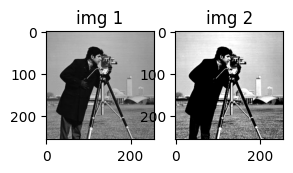

In [ ]:
# Mean Bias MB From Research Paper

def MB_Function(img1, img2):

  img1_mean = np.mean(img1)
  img2_mean = np.mean(img2)

  mb_value = (img1_mean - img2_mean) / img1_mean

  return mb_value

plt.subplot(1, 4, 1)
plt.imshow(img2 , cmap='gray')
plt.title('img 1')
plt.subplot(1, 4, 2)
plt.imshow(contrasted_img2 , cmap='gray')
plt.title('img 2')

img1_array = np.array(img2)
img2_array = np.array(contrasted_img2)

mb_v = MB_Function(img1_array, img2_array)
print("mb_v",mb_v)


Cross-Correlation: -1.0


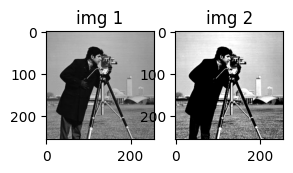

In [ ]:
# CC Cross Correlation Function

import numpy as np

def cc_calc(img1, img2):

    img1_mean = np.mean(img1)
    img2_mean = np.mean(img2)

    numerator = 2 * np.mean((img1 - img1_mean) * (img2 - img2_mean))
    denominator = np.mean((img1 - img1_mean)**2) + np.mean((img2 - img2_mean)**2)

    if denominator != 0:
        cc_value = numerator / denominator
    else:
        cc_value = 0

    return cc_value


plt.subplot(1, 4, 1)
plt.imshow(img2 , cmap='gray')
plt.title('img 1')
plt.subplot(1, 4, 2)
plt.imshow(contrasted_img2 , cmap='gray')
plt.title('img 2')

img1_array = np.array(img2)
img2_array = np.array(inversed_img2)

cc_value = cc_calc(img1_array, img2_array)
print("Cross-Correlation:", cc_value)
